In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
steam_data = pd.read_csv("steam.csv")

In [4]:
# Convertir la columna 'release_date' a tipo datetime
steam_data['release_date'] = pd.to_datetime(steam_data['release_date'], errors='coerce')

# Eliminar filas con fechas no válidas
steam_data = steam_data.dropna(subset=['release_date'])

# Crear nuevas columnas para análisis temporal
steam_data['release_year'] = steam_data['release_date'].dt.year
steam_data['release_month'] = steam_data['release_date'].dt.month
steam_data['release_day'] = steam_data['release_date'].dt.day

# Resumen de años de lanzamiento para verificar el rango temporal
release_year_summary = steam_data['release_year'].describe()

release_year_summary


count    27075.000000
mean      2016.498098
std          2.156990
min       1997.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: release_year, dtype: float64

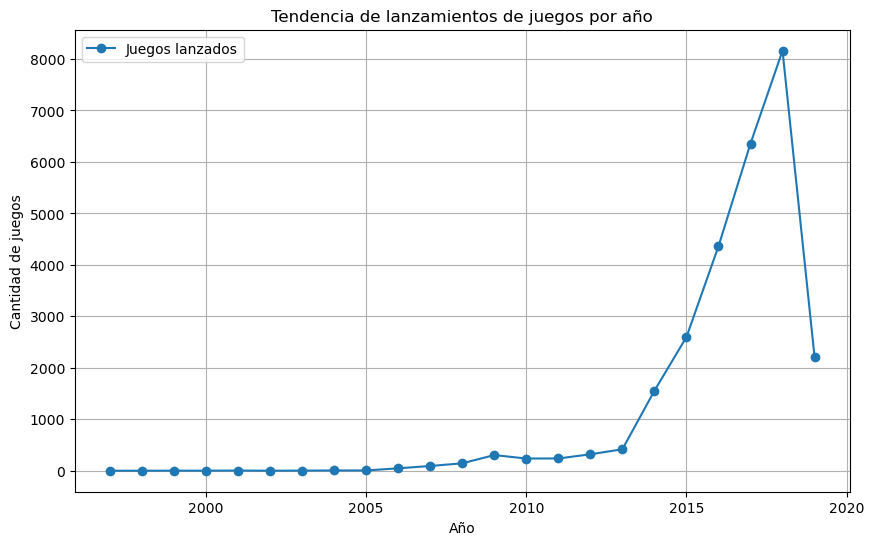

In [6]:

# Agregar la cantidad de juegos lanzados por año
games_per_year = steam_data.groupby('release_year').size()

# Visualizar la tendencia de lanzamientos por año
plt.figure(figsize=(10, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-', label='Juegos lanzados')
plt.title('Tendencia de lanzamientos de juegos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.grid()
plt.legend()
plt.show()


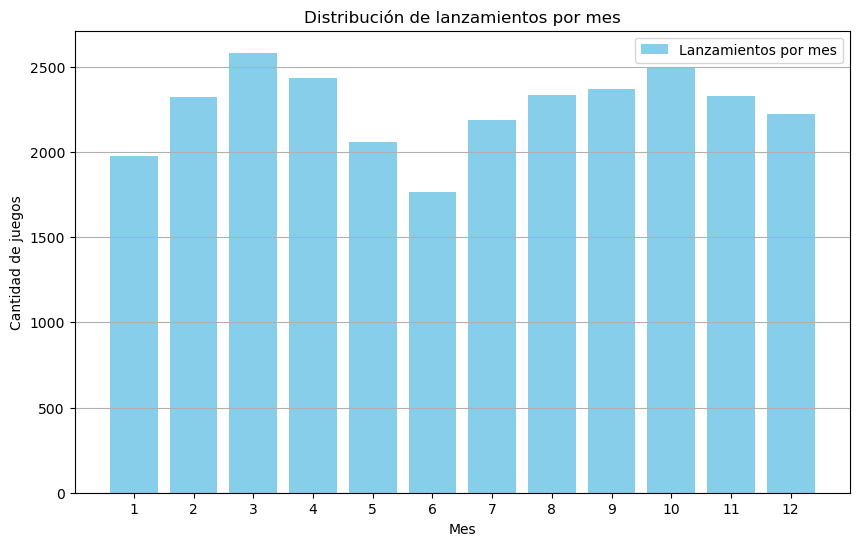

In [7]:
# Agrupar los datos por mes para analizar estacionalidad
games_per_month = steam_data.groupby('release_month').size()

# Visualizar lanzamientos por mes
plt.figure(figsize=(10, 6))
plt.bar(games_per_month.index, games_per_month.values, color='skyblue', label='Lanzamientos por mes')
plt.title('Distribución de lanzamientos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de juegos')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.legend()
plt.show()


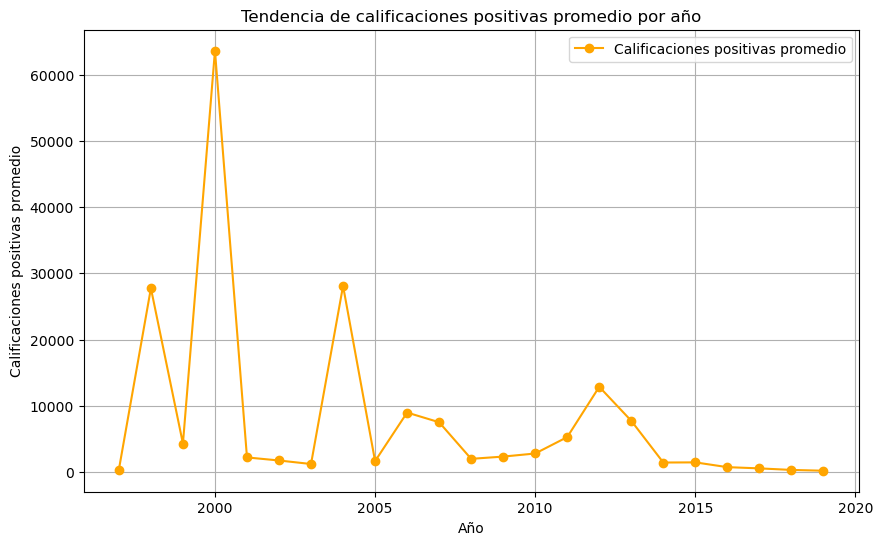

In [8]:
# Calcular el promedio de calificaciones positivas por año
average_positive_ratings = steam_data.groupby('release_year')['positive_ratings'].mean()

# Visualizar el promedio de calificaciones positivas a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(average_positive_ratings.index, average_positive_ratings.values, marker='o', color='orange', linestyle='-', label='Calificaciones positivas promedio')
plt.title('Tendencia de calificaciones positivas promedio por año')
plt.xlabel('Año')
plt.ylabel('Calificaciones positivas promedio')
plt.grid()
plt.legend()
plt.show()


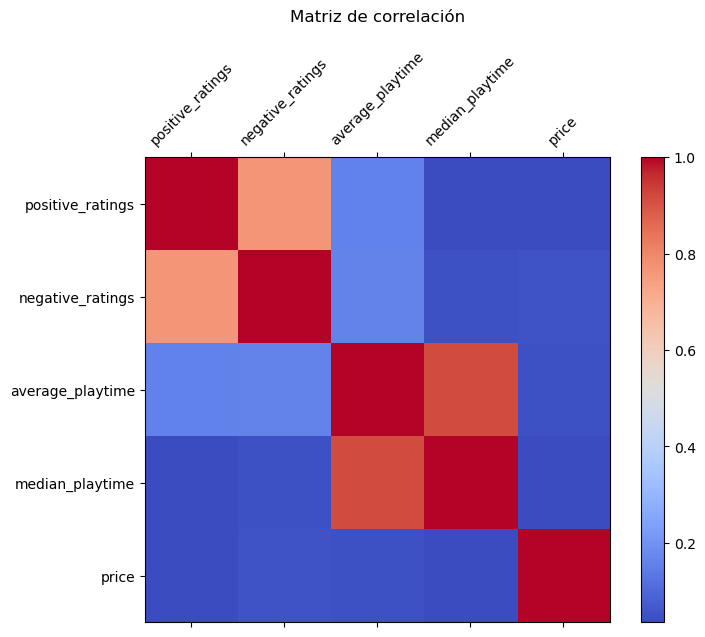

,positive_ratings,negative_ratings,average_playtime,median_playtime,price
positive_ratings,1.000000,0.762804,0.157898,0.035776,0.036110
negative_ratings,0.762804,1.000000,0.161140,0.047887,0.051259
average_playtime,0.157898,0.161140,1.000000,0.914900,0.049242
median_playtime,0.035776,0.047887,0.914900,1.000000,0.036610
price,0.036110,0.051259,0.049242,0.036610,1.000000


In [9]:
# Seleccionar las columnas relevantes para la correlación
correlation_data = steam_data[['positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matriz de correlación', pad=20)
plt.show()

correlation_matrix


In [18]:
steam_df = pd.read_csv('steam.csv')
all_steam_data_df = pd.read_csv('AllSteamData.csv')

In [23]:
print(steam_df.head())
print(all_steam_data_df.head())

   appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat

In [24]:
# Convertir la fecha de lanzamiento en steam_df
steam_df['release_date'] = pd.to_datetime(steam_df['release_date'], errors='coerce')

# Convertir la columna 'Month' en all_steam_data_df
all_steam_data_df['Month'] = pd.to_datetime(all_steam_data_df['Month'], format='%b-%y', errors='coerce')


In [26]:
# Eliminar filas con valores nulos en la columna 'Month'
all_steam_data_df = all_steam_data_df.dropna(subset=['Month'])


In [27]:
# Verificar valores faltantes
print(all_steam_data_df.isnull().sum())


Name                0
Month               0
Avg. Players        0
Gain                0
% Gain          37337
Peak Players        0
dtype: int64


In [28]:
# Agrupar por mes y calcular la media de jugadores promedio
avg_players_per_month = all_steam_data_df.groupby('Month')['Avg. Players'].mean()

# Visualizar las primeras entradas para verificar
print(avg_players_per_month.head())


Month
2012-07-01    325.607389
2012-08-01    297.709101
2012-09-01    304.358062
2012-10-01    277.746621
2012-11-01    313.018478
Name: Avg. Players, dtype: float64


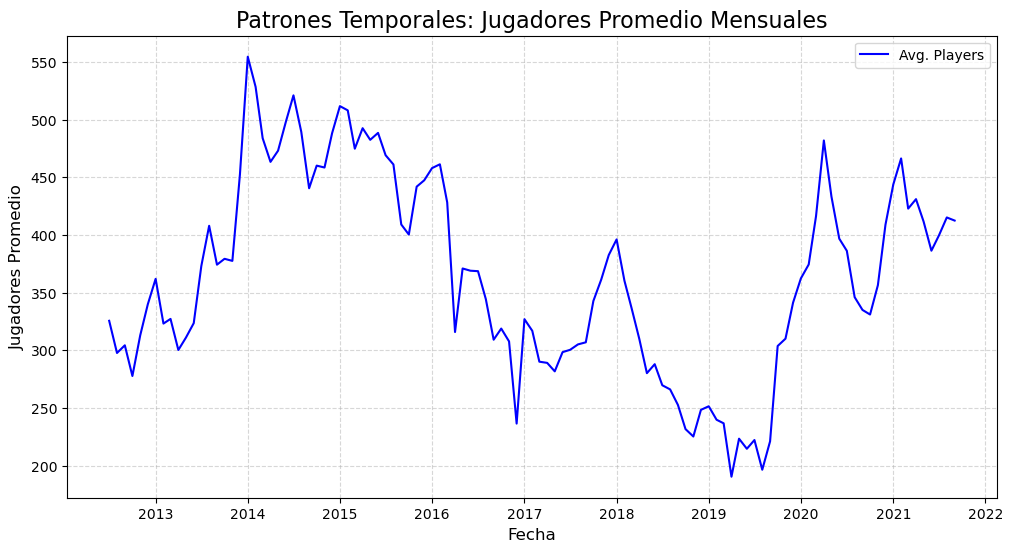

In [29]:
import matplotlib.pyplot as plt

# Crear un gráfico de línea para mostrar los patrones temporales
plt.figure(figsize=(12, 6))
plt.plot(avg_players_per_month.index, avg_players_per_month.values, label='Avg. Players', color='blue')
plt.title('Patrones Temporales: Jugadores Promedio Mensuales', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Jugadores Promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()
